# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM_haiku import unsupervised_HMM
from HMM_helper_haiku import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    get_haiku
)

In [2]:
from HMM_helper_haiku import get_haiku

In [3]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

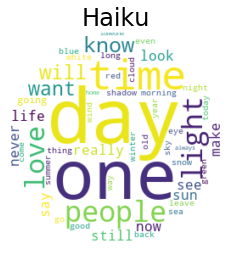

In [4]:
text = load_doc('data/haikus.txt')[0:130026].replace("<!endoftext!>", "\n")
wordcloud = text_to_wordcloud(text, title='Haiku')

In [5]:
obs, obs_map = parse_observations(text)

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [8]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 15, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

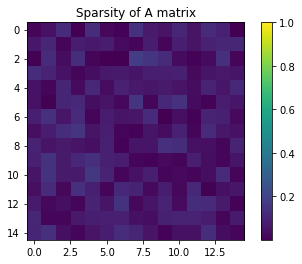

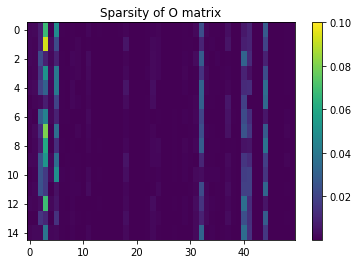

In [9]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [8]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=10))

Sample Sentence:
[198, 1940, 1737, 273, 1072, 375, 784, 254, 208, 976]
Tonight kings image if rest watch lost city here bad...


In [7]:
print("Haiku")
print(get_haiku(hmm8, obs_map))

Haiku
im citys cuddle
might though guess good i makes
morning as look her


In [155]:
print("Haiku")
print(get_haiku(hmm8, obs_map))

Haiku
seething people its
my full light sometimes
concrete stairs said


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [6]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
Power president states iv the engage service no of entered the or adding ability and an between be he pursuance he calling each vice the...


In [7]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
Having particular the on houses with be shall or when another in place president representatives to proper of places all throughout the when the or...


In [8]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
Of the the bill of be members judgment constitution and the consent of this word by inferior thousand the first and then nor and shall...


In [9]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
Time in which up proper be prescribed present the word of their no house except and union such any same have money to money by...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

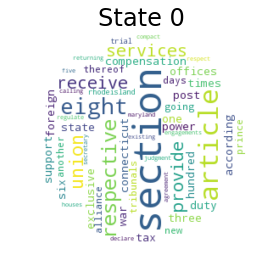

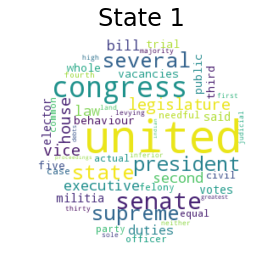

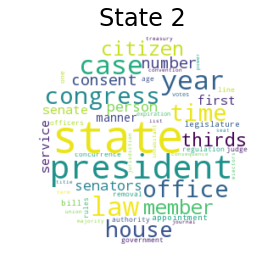

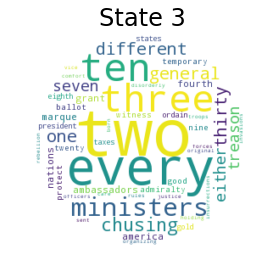

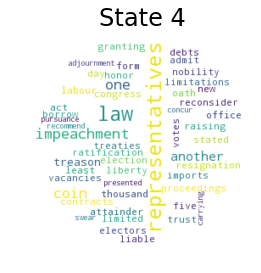

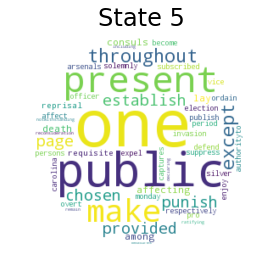

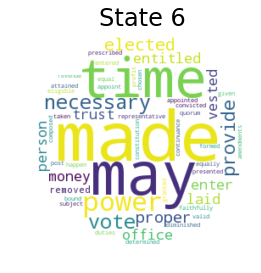

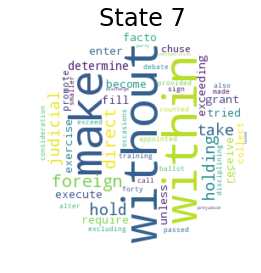

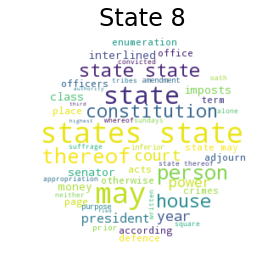

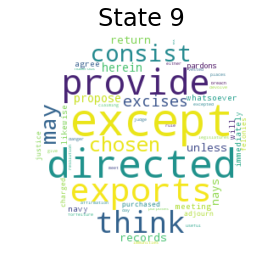

In [10]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

0
1
2
3
4
5
6
7
8
9
10
11
skipped 12
13
14

Animating...


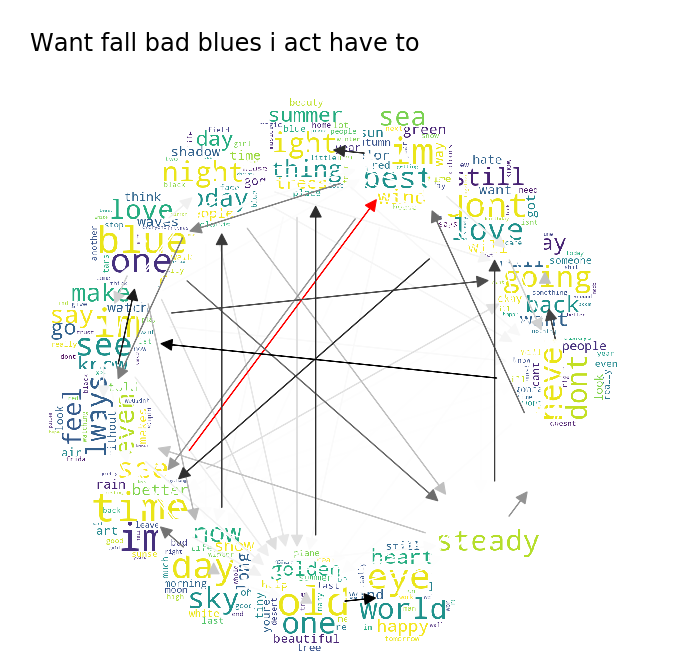

In [156]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())